# p.187 연습
Regressor 모델을 이용하여 얻은 예측값으로 MSE, RMSE, MAE, MAPE를 계산하고, 모델 성능을 평가하시오.

# Step 0. 패키지 불러오기

In [8]:
# 데이터 구성
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 한글, 음수 표시
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
# 데이터 분리
from sklearn.model_selection import train_test_split
# Regression
import statsmodels.formula.api as smf
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor as DTR
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor as RFR
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor as GBR
# GridSearchCV
from sklearn.model_selection import GridSearchCV
# 평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# 경고 메시지
import warnings
warnings.filterwarnings('ignore')

### 평가 함수 정의

In [2]:
# RMSE : Root Mean Squared Error
def root_mean_squared_error(y_true, y_pred) :
    return np.sqrt(mean_squared_error(y_true, y_pred))
# MAPE : Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred) :
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Step 1. 데이터 구성하기

### 데이터 불러오기

In [3]:
df_raw = pd.read_csv('D:/Study/posco/2_bigdata/raw_data/체질검사.csv')
df_raw.head(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8


### 데이터 분리

In [5]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT', axis = 1, inplace = False)
# train/test 데이터 분리
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)
print('train data :', df_train.shape)
print('test data :', df_test.shape)
# train/test x/y 데이터 분리
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
print('\ntrain data X size :', df_train_x.shape)
print('train data Y size :', df_train_y.shape)
print('test data X size :', df_test_x.shape)
print('test data Y size :', df_test_y.shape)

train data : (176, 14)
test data : (76, 14)

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76,)


# Step 2. 모델 생성

In [12]:
# Regression
lr_model = smf.ols(formula = 'FAT ~ HEIGHT + NECK + ABDOMEN + HIP + FOREARM',
                    data = df_train)
lr_result = lr_model.fit()

# DecisionTreeRegressor
dt_model = DTR(random_state = 1234,
               min_samples_leaf = 8,
               min_samples_split = 20,
               max_depth = 4)
dt_model.fit(df_train_x, df_train_y)

# RandomForestRegressor
rf_model = RFR(random_state = 1234, 
               n_estimators = 100,
               min_samples_leaf = 6,
               min_samples_split = 14,
               max_depth = 4)
rf_model.fit(df_train_x, df_train_y)

# GradientBoostingRegressor
gb_model = GBR(random_state = 1234, 
               n_estimators = 30,
               min_samples_leaf = 11,
               min_samples_split = 22,
               max_depth = 4,
               learning_rate = 0.1)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=11,
                          min_samples_split=22, n_estimators=30,
                          random_state=1234)

# Step 3. 모델 평가 저장

### 변수 생성

In [13]:
# index
models = ['Regression','Decision Tree','Random Forest','Gradient Boosting']
# 평가 리스트 초기화
mse, rmse, mae, mape = [],[],[],[]

### Regression

In [15]:
# 예측
lr_y_pred = lr_result.predict(df_test)

# 평가
mse.append(mean_squared_error(df_test['FAT'], lr_y_pred))
rmse.append(root_mean_squared_error(df_test['FAT'], lr_y_pred))
mae.append(mean_absolute_error(df_test['FAT'], lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test['FAT'], lr_y_pred))

### Decision Tree

In [16]:
# 예측
dt_y_pred = dt_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

### Random Forest

In [17]:
# 예측
rf_y_pred = rf_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

### Gradient Boosting

In [18]:
# 예측
gb_y_pred = gb_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

# Step 4. 시각화

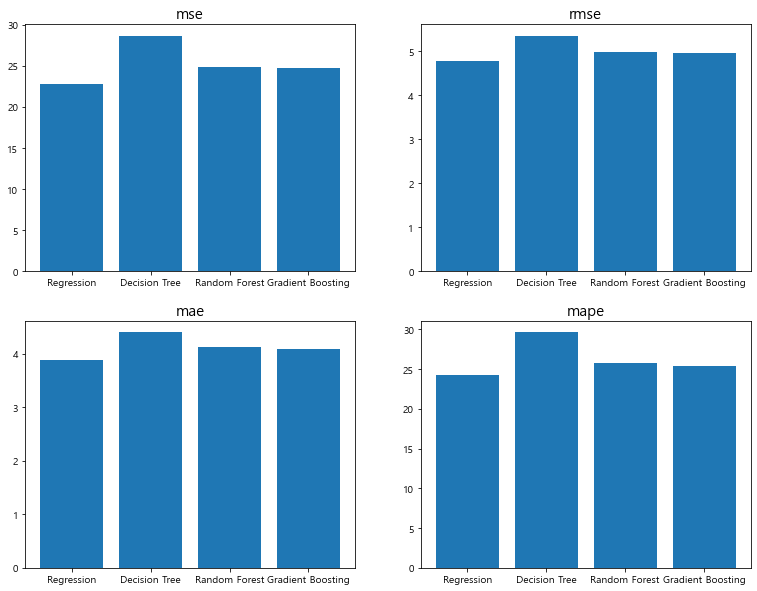

In [20]:
fig, ax = plt.subplots(2, 2, figsize = (13,10))

ax[0,0].bar(models, mse)
ax[0,0].set_title('mse').set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title('rmse').set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title('mae').set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title('mape').set_fontsize(15)

* Regression 정확도가 가장 높고, Decision Tree 성능이 가장 낮다.